# Midterm Project : M.A.F.I.A. in the morning(2)
* * *

## 2. 경찰은 마피아를 찾습니다
* 가장 단순한 게임에 경찰이 들어옵니다.
    * 경찰은 매일 시작 전에 사람을 지목해서 마피아인지 확인할 수 있습니다.
        * 마피아를 지목할수도, 시민을 지목할 수도 있지요
    * 경찰이 마피아를 확인한다면 마피아가 발각될 확률을 약간 올려준다고 생각해 봅시다. 
        * 이 확률도 parameter로 쓸 수 있겠죠?
    * 경찰의 기억력은 형편 없어서 그날 확인한 사람은 당일만 알고 있는 경우도 생각해보고
    * 경찰이 기억력이 좋아서 그날 확인한 사람을 계속 알고 있는 경우도 생각해볼 수 있겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 참고로 경찰은 시민의 일종입니다. 마피아가 밤에 죽일 수도 있습니다.

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### 구현 방법

- practice1을 기반으로 경찰을 추가
- 경찰은 마피아를 찾음
    - 편의를 위해 구현은 낮에 하였으나 살인이 끝난 후 새벽에 마피아를 검거한다는 설정
- 랜덤하게 참가자중 한 명을 찾고 마피아인지 확인
    - 마피아가 맞다면 인덱스를 반환
- 낮투표중 경찰의 신뢰도를 랜덤하게 반환
    - 신뢰도는 참가 인원 중 몇 명을 신뢰하게 만들었는지로 확인
    - 과반수 이상 일 경우 기존 투표결과를 경찰이 찾은 마피아로 변경

### Code

- 기존 코드에서의 변경 내용을 표시

In [38]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    police=list.count("police")
    participant = mafia + citizen + police
    return mafia, citizen, police, participant

def modefinder(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

- police_Find(리스트) : 참가 인원 중 랜덤하게 한 명을 지목해 마피아를 찾으면 그 인덱스를 반환

In [39]:
def police_Find(participant):
    arrest=random.randrange(0, len(participant)-1)
    if participant[arrest]=="police":
        police_Find(participant)
    elif participant[arrest] == "mafia":
        return arrest
    return None

- police_arrest(인덱스, 리스트) : 경찰이 살아있을 때, 경찰에 대한 시민의 신뢰도를 랜덤하게 결정, 과반수 이상일 때 마피아 인덱스를 반환

In [40]:
def police_arrest(vote, participants):
    if participants.count("police") == 0:
        return vote
    else:
        trust=random.randrange(0, len(participants))
        if trust*2 > len(participants):
            find = police_Find(participants)
            if find!=None:
                return find
    return vote

- 낮투표의 최빈값을 계산, 경찰의 신뢰도가 과반수 이상이면 투표를 무시하고 마피아를 검거

In [41]:
def day_Vote(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    max_vote=police_arrest(max_vote, participants)
    del participants[max_vote]
    return participants

In [42]:
def night_Kill(participants):
    vote_list=list()
    mafia_idx=0
    mafia_count=participants.count("mafia")
    while(participants[mafia_idx] == "mafia"):
        vote=random.randrange(mafia_count, len(participants))
        vote_list.append(vote)
        mafia_idx+=1
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [43]:
Game_Endday=list()

In [44]:
def in_Game(participants):
    turn = "morning"
    day=1
    mafia, citizen, police, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
            day+=1
        mafia, citizen, police, people = people_Count(participants)
        #print(participants)
    Game_Endday.append(day)
    if mafia == 0:
        return True
    else:
        return False

In [45]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    police=participants.count("police")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(police, "police", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [86]:
def Mafia_Game_withPolice_Stats(num_mafia, num_citizen, num_police):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    citizen_win_list=list()
    # for i in range (0, 10000):
    for i in range (0, 100):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_withPolice_Stats(1,0,9)

In [47]:
def Mafia_Game_changewithPolice(num_mafia, num_citizen, num_police):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    participants = mafia + citizen + police
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        if citizen==0:
            police -=1
        else:
            citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

### Data Frame
- 마피아가 2명, 시민이 7명, 경찰이 1명일 때 100번의 게임 중 시민의 우승 확률을 100번 구함

In [48]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_withPolice_Stats(2, 7, 1)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,8.0
2,7.0
3,4.0
4,7.0
5,10.0
...,...
96,10.0
97,19.0
98,7.0
99,8.0


### Histogram

- x축은 횟수, y축은 시민의 승률
- 마피아 2, 시민 7, 경찰 1명일 때의 시민의 승률

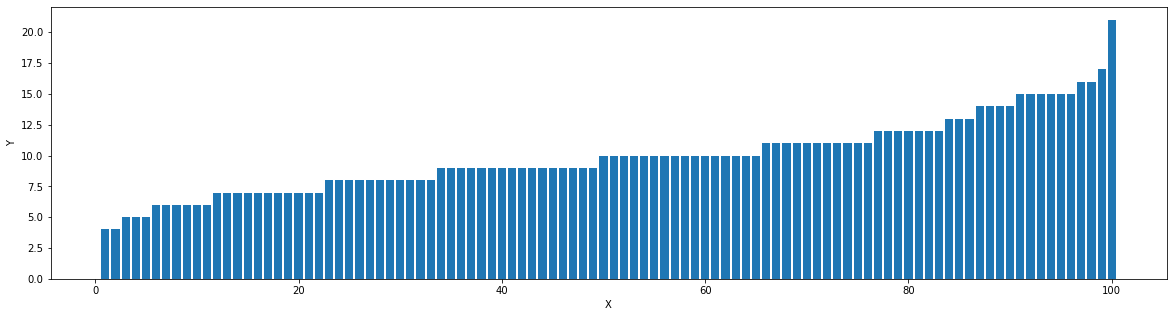

In [87]:
def drawHIST(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

def drawPLT(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.plot(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_withPolice_Stats(2, 7, 1)
Game_Stats.sort()
drawHIST(Game_Stats)

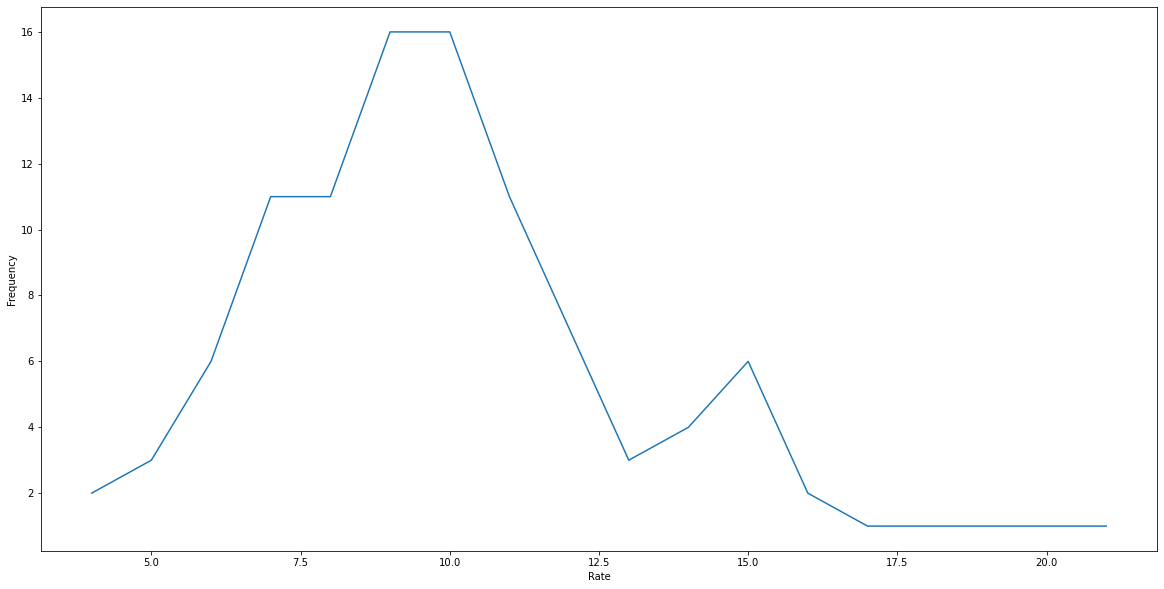

In [88]:
c = Counter(Game_Stats) 
plt.figure(figsize=(20,10))
plt.plot(c.keys(), c.values())
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()
plt.close()

### Plot Chart

- 마피아는 2명, 각각 경찰이 0명, 3명, 5명일 때의 차트

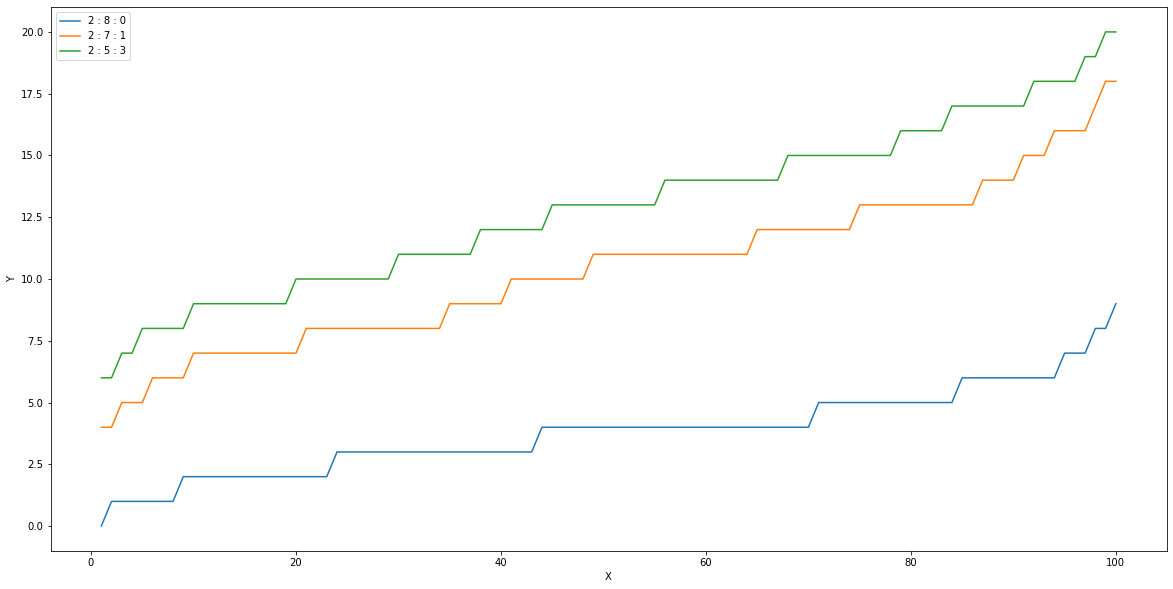

In [51]:
Game_Endday.clear()
Game_Stats1 = Mafia_Game_withPolice_Stats(2, 8, 0)
Game_Stats1.sort()
Game_Stats2 = Mafia_Game_withPolice_Stats(2, 7, 1)
Game_Stats2.sort()
Game_Stats3 = Mafia_Game_withPolice_Stats(2, 5, 3)
Game_Stats3.sort()

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="2 : 8 : 0")
plt.plot(list0, Game_Stats2, label="2 : 7 : 1")
plt.plot(list0, Game_Stats3, label="2 : 5 : 3")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

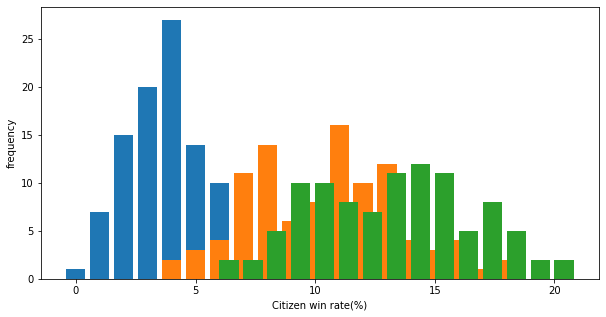

In [52]:
c1 = Counter(Game_Stats1) 
c2 = Counter(Game_Stats2) 
c3 = Counter(Game_Stats3) 
plt.figure(figsize=(10,5))
plt.bar(c1.keys(), c1.values())
plt.bar(c2.keys(), c2.values(), align="center")
plt.bar(c3.keys(), c3.values(), align="edge")
plt.xlabel("Citizen win rate(%)")
plt.ylabel("frequency")
plt.show()
plt.close()

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3에 대해 10,000단위 구분

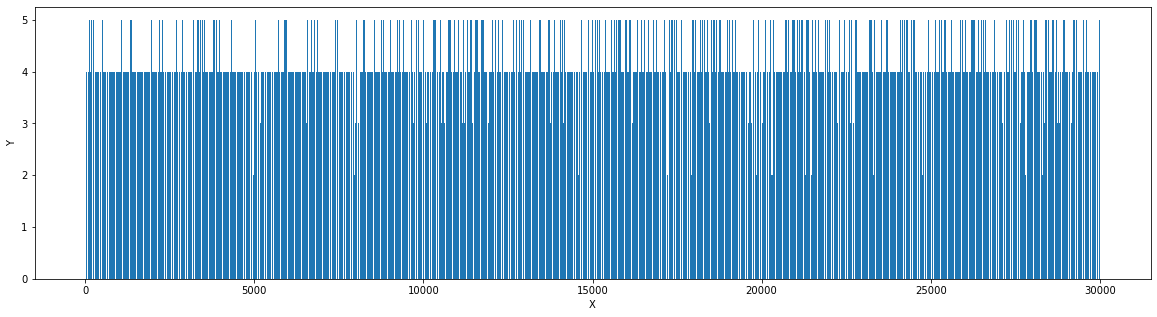

In [53]:
drawHIST(Game_Endday)
# drawPLT(Game_Endday[:10000])
# drawPLT(Game_Endday[10000:20000])
# drawPLT(Game_Endday[20000:30000])
Game_Endday.clear()

### Data Frame
- 경찰 3명을 포함한 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [54]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithPolice(0, 97, 3)[:20]
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,82.0
2,73.0
3,50.0
4,29.0
5,16.0
6,9.0
7,13.0
8,2.0
9,4.0
10,0.0


### Histogram

- 경찰 3명을 포함한 전체 게임인원 각 10, 50, 100명
- x축은 마피아의 명 수, y축은 시민의 승률

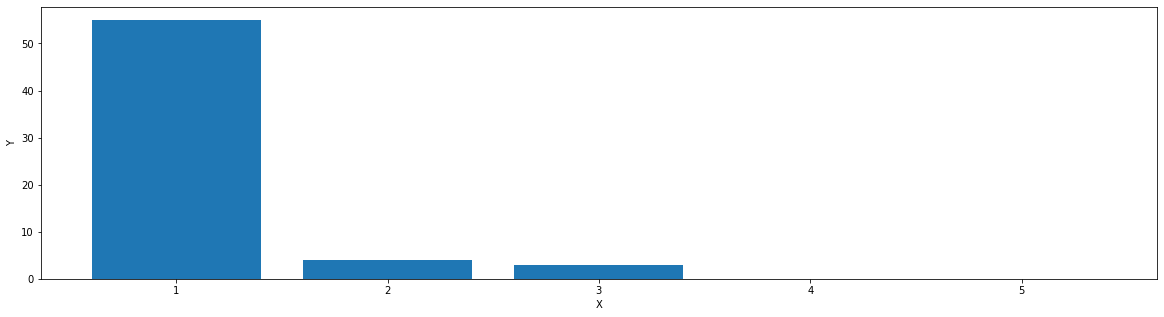

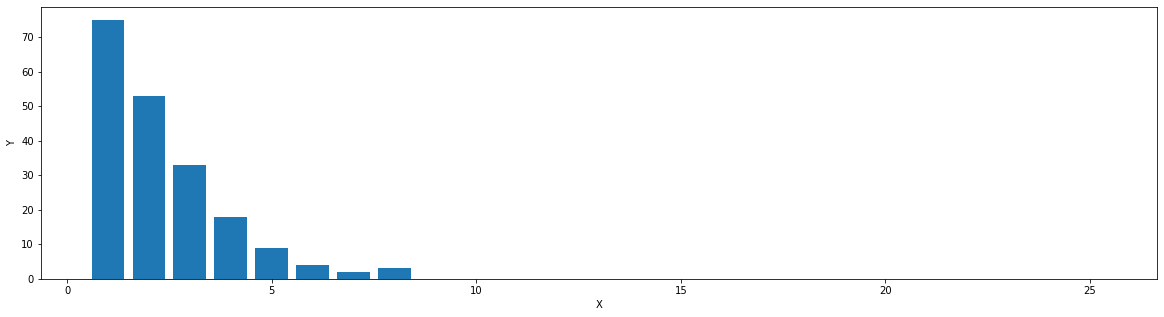

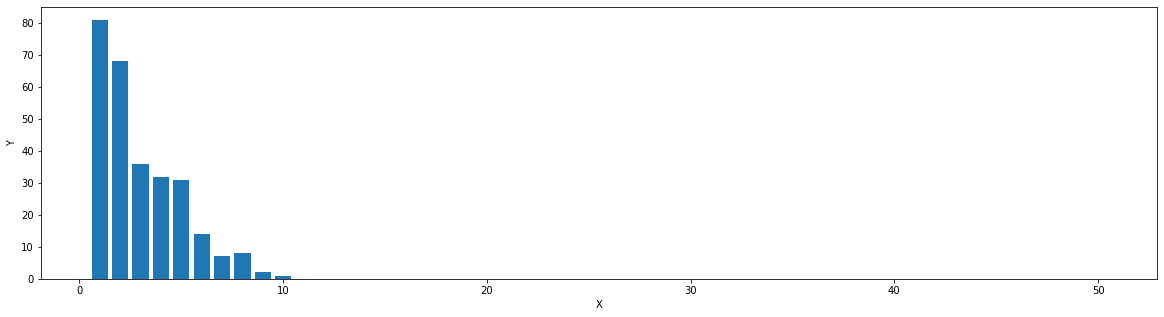

In [55]:
Game_Stats = Mafia_Game_changewithPolice(0, 7, 3)
drawHIST(Game_Stats)

Game_Stats = Mafia_Game_changewithPolice(0, 47, 3)
drawHIST(Game_Stats)

Game_Stats = Mafia_Game_changewithPolice(0, 97, 3)
drawHIST(Game_Stats)

### Plot Chart

- 전체 게임인원 50명, 경찰의 비율을 조정
- x축은 마피아의 명 수, y축은 시민의 승률

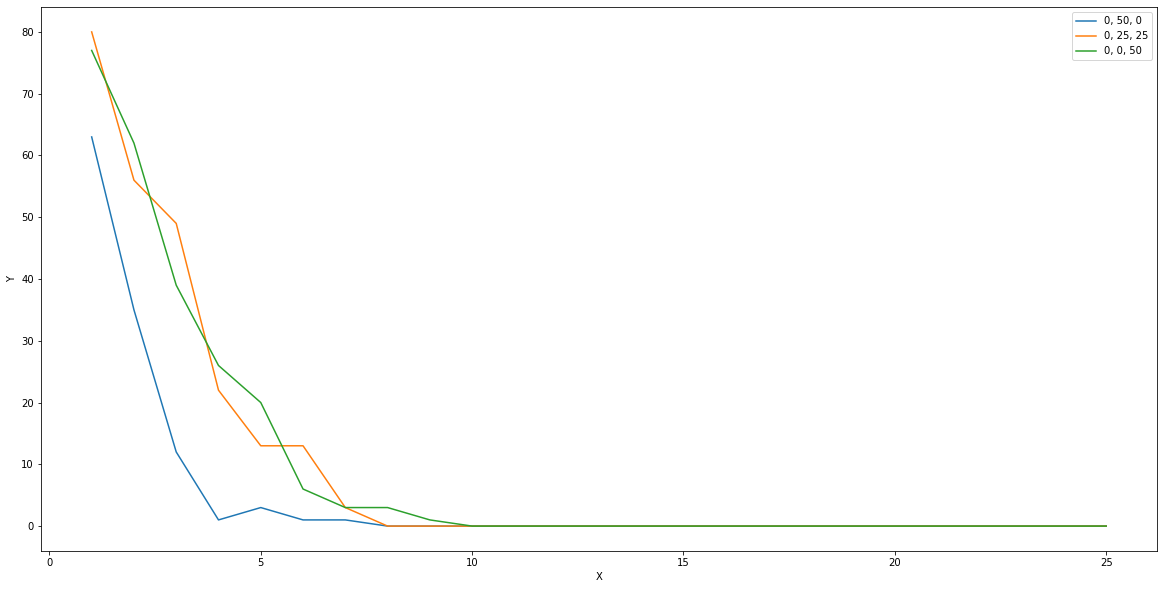

In [56]:
Game_Endday.clear()
Game_Stats1 = Mafia_Game_changewithPolice(0, 50, 0)
Game_Stats2 = Mafia_Game_changewithPolice(0, 25, 25)
Game_Stats3 = Mafia_Game_changewithPolice(0, 0, 50)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="0, 50, 0")
plt.plot(list0, Game_Stats2, label="0, 25, 25")
plt.plot(list0, Game_Stats3, label="0, 0, 50")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3에 대해 2,500단위 구분

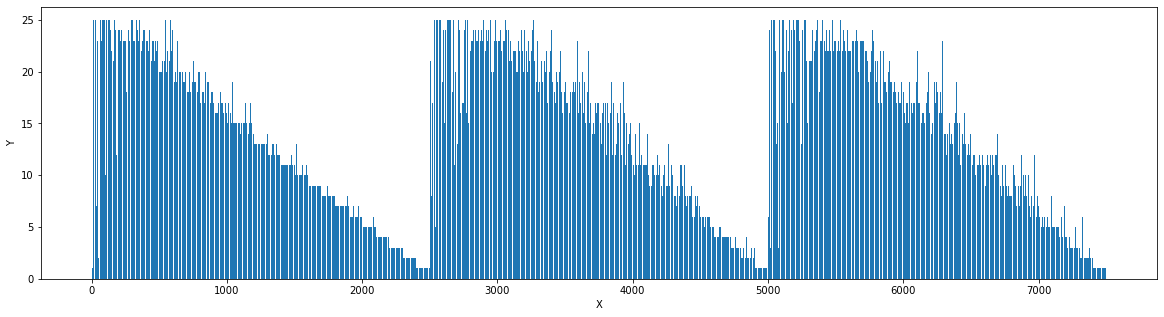

In [57]:
drawHIST(Game_Endday)
Game_Endday.clear()

### 분석
---
- 경찰의 합류로 시민의 우승확률이 대체적으로 상승함
    - 경찰이 많아질수록 상승하지만 시민 전원이 경찰이어도 큰 변화를 보이지는 않음
---
- 랜덤확률이 추가로 더해졌기 때문에 그래프에 변화가 생김
    - 게임이 종료되는 시점의 편차가 커짐
---
- 경찰의 역할에 따라 승률, 진행시간 모두 영향을 줌. 
---